### Student Information
Name: Zhang Zhuqing

Student ID: t14902204

GitHub ID: shinshin512

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main xercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 1. Data Preparation

### 1.1. Load Data

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

# read data file and store it in df
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

### 1.2. Split train and test df

In [69]:
# split into train and test df
df_train, df_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# reindex since the train_test_split randomly choose the data, causing unorganized index
df_train.reset_index(inplace=True, drop=True)

Focusing on only train data for now

### 1.3. Data Exploration

In [70]:
# observe data
df_train.head(5)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-12 2:38:39,mmo7i6j,wallstreetbets,Retail giant TARGET has now declined for 10 co...,DaimonHans,https://i.redd.it/7tl6puv9waue1.jpeg,1,NaN,NaN,10 consecutive weeks _so far_,1.000000,0.100000,1.0,['far_'],0.0
1,comment,2025-04-11 12:58:20,mmk0kwi,StockMarket,$ U.S. dollar value (crashing),blufin,https://i.redd.it/atvlo83gk4ue1.jpeg,1,NaN,NaN,"US Treasuries were the safe haven, but now eve...",0.728571,-0.195238,-1.0,"['reason', 'behaviour', 'one', 'the orange mes...",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,comment,2025-04-11 9:02:58,mmj7m0q,StockMarket,🚨China responds to Trump’s 145% tariff with an...,hypocrisy-identifier,https://i.redd.it/2f7y4h6226ue1.jpeg,1,NaN,NaN,Really good one!!,0.600000,1.000000,1.0,[],1.0
4,comment,2025-04-11 17:17:49,mmlfnzp,wallstreetbets,Retardation is on the menu boys! WSB is so back,Roddykins1,https://i.redd.it/0yq2ftren8ue1.jpeg,12,NaN,NaN,Something about it always made me giggle.,0.000000,0.000000,0.0,['giggle'],0.0


In [71]:
df_train.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

In [72]:
df_train.shape

(677, 16)

In [73]:
# print out the text data for the first three samples in the dataset
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(df_train.text[i].split("\n")))

example 1
10 consecutive weeks _so far_
example 2
US Treasuries were the safe haven, but now everyone's shifting to gold instead. A recession is coming, tariffs are coming, an unpredictable political situation with possible autocracy and the arbitrary behaviour that produces is coming. We've seen the rule of law breaking down with the regime basically doing what they want without consequence. No one wants to have any assets in the US when they decide to start confiscating them for insulting the orange messiah or whatever crazy reason they come up with.
example 3
Seeing lots of red in the ticker.


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

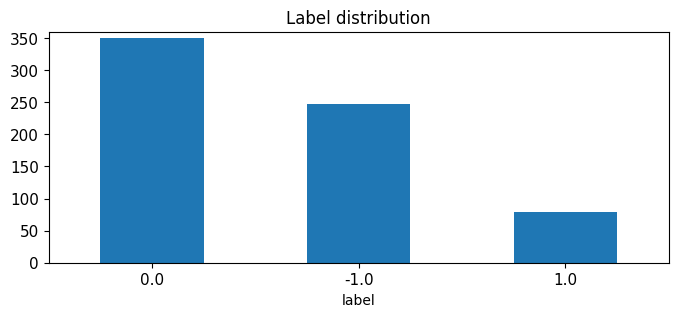

In [74]:
import matplotlib.pyplot as plt

# observe the distribution of label column
df_train.label.value_counts().plot(kind = 'bar',
                                    title = 'Label distribution',
                                    ylim = [0, 360],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

## 2. Data Transformation

### 2.1. Feature Selection

1. Essential columns
- text – the raw text of the post/comment. This is your main input for text mining.
- label – the target variable you want to predict (1.0, 0.0, -1.0).

2. Optional but helpful columns - **future enhancements**
- title – sometimes adds extra context to the post. You can combine it with text.
- subjectivity & polarity – precomputed sentiment features; can boost model performance without extra text processing.
- upvotes, downvotes, upvote_ratio – may give context about how others perceive the post.
- type – comment vs post; occasionally useful for patterns in sentiment.

3. Columns you can safely ignore
- datetime (unless doing temporal analysis)
- post_id, url (unique identifiers, not predictive)
- subreddit, author (can be useful if you want extra features, but optional)
- entities (only if you want named-entity info; not strictly necessary for basic sentiment prediction)

In [75]:
# filter to only essential columns
X = df_train[['text', 'label']]

### 2.2. Familiarizing with the Data

In [76]:
# display the top 5 of X
X.head(5)

,text,label
0,10 consecutive weeks _so far_,0.0
1,"US Treasuries were the safe haven, but now eve...",0.0
2,Seeing lots of red in the ticker.,0.0
3,Really good one!!,1.0
4,Something about it always made me giggle.,0.0


In [77]:
# Display only the first ten records of text column
X.loc[:10, 'text']

0                         10 consecutive weeks _so far_
1     US Treasuries were the safe haven, but now eve...
2                     Seeing lots of red in the ticker.
3                                     Really good one!!
4             Something about it always made me giggle.
5     Poor slave, thinking they're free and democrat...
6     Calling it anything but a trade embargo at thi...
7     $GE rose today on drone news. Here's the daily...
8                                 [ Removed by Reddit ]
9     I bet he is about to impose more tariffs somew...
10    So countries “begging to stop the tariffs” and...
Name: text, dtype: object

In [78]:
# Display only the top 5 text column with label of 1.0
X[X['label']==1.0].head(5)

,text,label
3,Really good one!!,1.0
10,So countries “begging to stop the tariffs” and...,1.0
25,Now this is some wholesome stuff more companie...,1.0
27,Hey I have just done this. I have used 25 stoc...,1.0
31,"OK, let me kick this off:\n\nLong (large expos...",1.0


## 3. Data Mining using Pandas

### 3.1. Missing Values

In [79]:
# check for null
X.isnull().sum()

text     0
label    0
dtype: int64

### 3.2. Duplicated Values

In [80]:
# check for duplicate
sum(X.duplicated())

20

In [81]:
# remove all duplicates, keeping only the uniques
X_cleaned = X.drop_duplicates(keep=False).reset_index(drop=True)

### 3.3. Remove URLs

In [82]:
# Remove URLs (if any)

X_cleaned['cleaned_text'] = X_cleaned['text'].str.replace(r'https?://\S+|www\.\S+', '', regex=True)

Some cleaning such as removing whitespaces or lowercase the text will be done in CounterVectorizer anyways

### 3.4. Replace underscore with a whitespace

In [83]:
X_cleaned['cleaned_text'] = X_cleaned['cleaned_text'].str.replace('_', ' ')

### 3.5. Remove unnecessary punctuations

In [84]:
X_cleaned['cleaned_text'] = X_cleaned['cleaned_text'].str.replace(r"[^\w\s!?']", '', regex=True)

## 4. Data Preprocessing

### 4.1. Feature subset selection


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

# only training data
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_cleaned.cleaned_text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(2))	1
  (np.int32(0), np.int32(754))	1
  (np.int32(0), np.int32(3567))	1
  (np.int32(0), np.int32(3004))	1
  (np.int32(0), np.int32(1235))	1


Some examples of what each feature is based on their index in the vector:

In [86]:
count_vect.get_feature_names_out()[443]

'bitb'

In [87]:
count_vect.get_feature_names_out()[0:10]

array(['01378hk', '01728', '10', '100', '10000', '100027', '100k', '100x',
       '101000', '1050'], dtype=object)

In [88]:
analyze = count_vect.build_analyzer()
analyze(X_cleaned.cleaned_text[0])

['10', 'consecutive', 'weeks', 'so', 'far']

In [89]:
# convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [90]:
# Answer here
normal_arr = X_counts[4, 0:100].toarray() # store the array in a variable
 
for i in range(0, len(normal_arr[0])):
    # find any tokens exist in the document
    if normal_arr[0][i] == 1:
        print(f"The {i}th word is {count_vect.get_feature_names_out()[i:i+1]}")

#### Heatmap of Words 

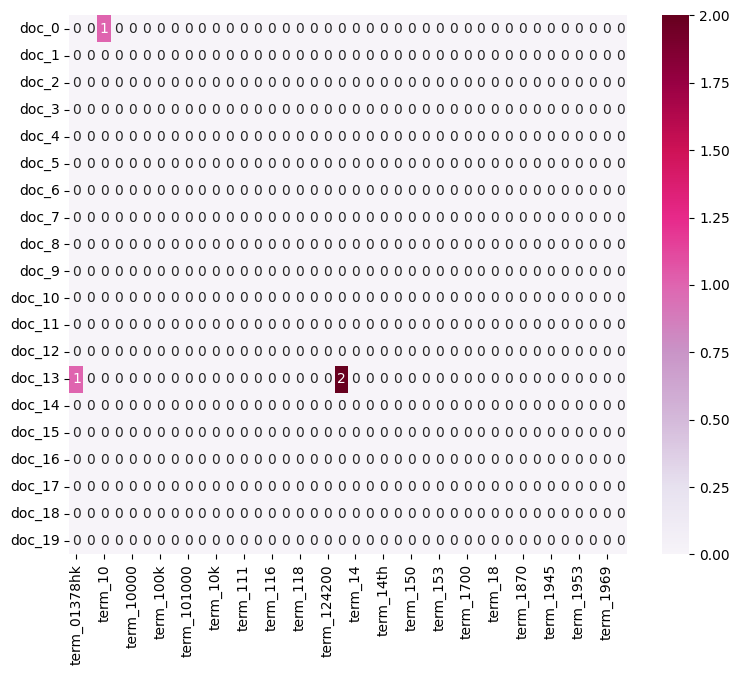

In [91]:
# first 20 features only, observe only first 40 words
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = X_counts[0:20, 0:40].toarray() #X_counts [how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 annot=True) 


### 4.2. Attribute Transformation / Aggregation

####  4.2.1 Transform Text Data

In [92]:
import numpy as np

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [93]:
#sum of first term
term_frequencies[0]

np.int64(1)

/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_6360/952351393.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



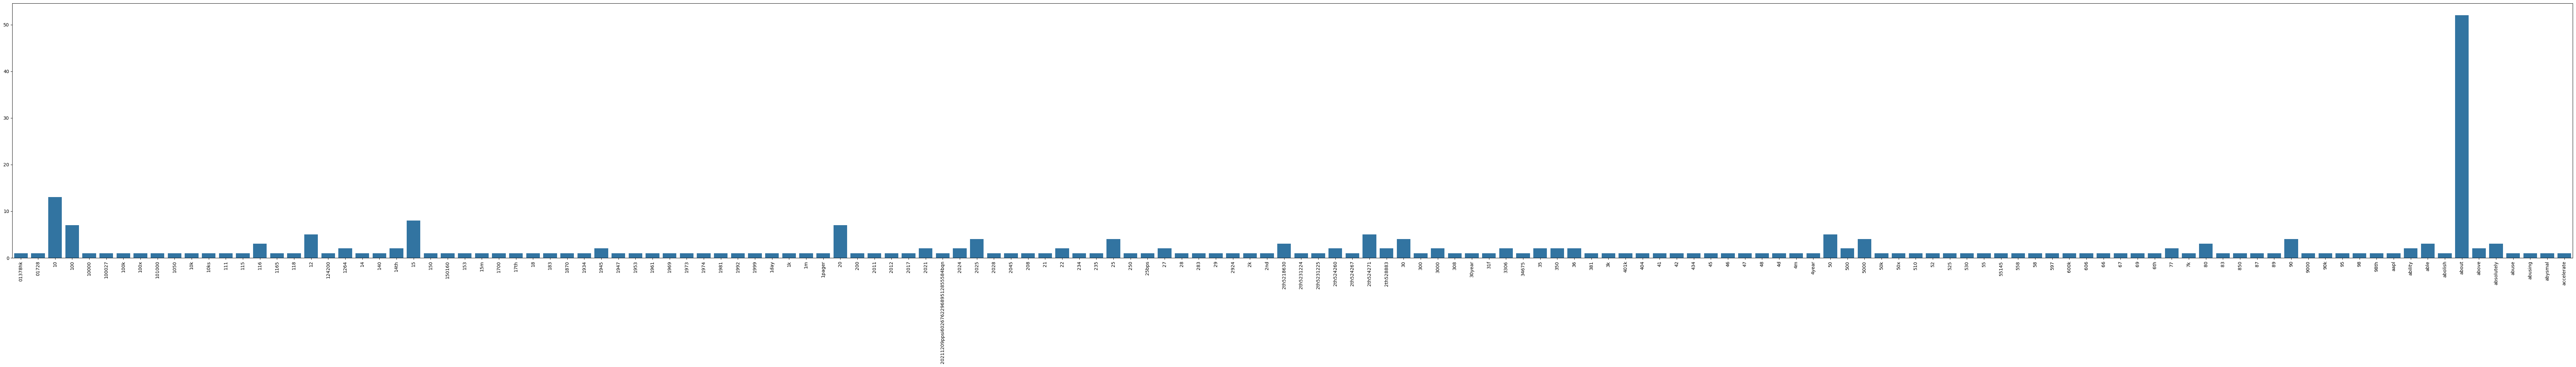

In [94]:
# plot the frequencies of the first 150 terms
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:150], 
            y=term_frequencies[:150])
g.set_xticklabels(count_vect.get_feature_names_out()[:150], rotation = 90);

In [95]:
# plot the frequencies of the first 150 terms by plotly
import plotly.express as px

words = count_vect.get_feature_names_out()[:150]
counts = term_frequencies[:150]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 150 Words')
fig.show()


In [96]:
# observe only top 150 frequently used words
import plotly.express as px

idx = term_frequencies.argsort()[::-1][:150]
words = count_vect.get_feature_names_out()[idx]
counts = term_frequencies[idx]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 150 Words')

fig.show()

In [97]:
# display the frequency of terms in form of log
import plotly.express as px

idx = term_frequencies.argsort()[::-1][:150]
words = count_vect.get_feature_names_out()[idx]
counts = term_frequencies[idx]

fig = px.bar(x=words, y=counts, 
             labels={'x': 'Word', 'y': 'Frequency'}, 
             title='Top 150 Words (log)')

fig.update_yaxes(type="log")

fig.show()

# Phase 2

In [98]:
### Begin Assignment Here

### Finding Frequent Patterns

In [99]:
X = X_cleaned.copy()
X['label'].unique() 

array([ 0.,  1., -1.])

In [100]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
label_map = {
    0: 'neutral',
    1: 'positive',
   -1: 'negative'
}

# Create mapped labels without modifying the original DataFrame
mapped_labels = X['label'].map(label_map)

# Get unique categories
categories = mapped_labels.unique()

category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[mapped_labels == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [101]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=-1 #You can change it from 0 to 2
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category negative:


,10,100,1000,10000,12,14th,15,150,160,1700,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


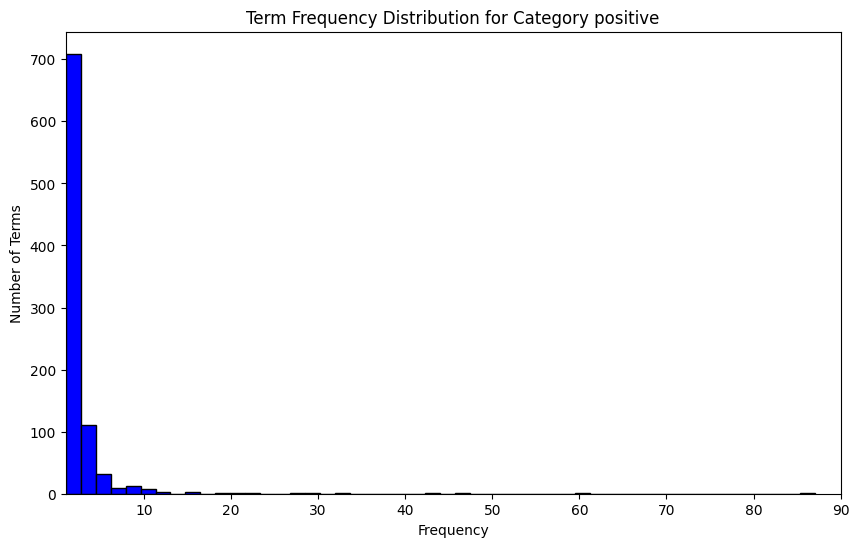

In [102]:
 # Sum over all documents to get total frequency for each word
category_number=1 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=50, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 90)
plt.show()

In [103]:
# top 5 percent

category_number=2 #You can change it from 0 to 2
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 6.5% most frequent terms
total_terms = len(sorted_counts)
top_3_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 6.5% most frequent terms
top_3_5_percent_indices = sorted_indices[:top_3_5_percent_index]

# Filter terms that belong to the top 6.5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_3_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 6.5%: {top_3_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: negative
Number of terms in top 6.5%: 94
Filtered terms: ['the', 'to', 'and', 'is', 'it', 'of', 'in', 'that', 'will', 'this', 'he', 'for', 'be', 'you', 'are', 'trump', 'they', 'as', 'us', 'on', 'china', 'but', 'so', 'all', 'have', 'not', 'just', 'we', 'has', 'what', 'his', 'if', 'was', 'at', 'with', 'their', 'can', 'about', 'more', 'people', 'even', 'them', 'there', 'no', 'or', 'think', 'now', 'my', 'market', 'going', 'like', 'one', 'him', 'than', 'make', 're', 'get', 'economy', 'how', 'would', 'by', 'up', 'do', 'when', 'from', 'other', 'some', 'money', 'trade', 'over', 'out', 'any', 'fuck', 'see', 'doesn', 'doing', 'tariffs', 'good', 'then', 'only', 'world', 'don', 'who', 'an', 'why', 'been', 'point', 'because', 'wants', 'much', 'everyone', 'could', 'time', 'literally']


In [104]:
# bottom 1 percent

category_number=2 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1.2% least frequent terms
total_terms = len(sorted_counts)
bottom_12_percent_index = int(0.025 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_12_percent_indices = sorted_indices[:bottom_12_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_12_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1.2%: {bottom_12_percent_index}")
print(f"Filtered terms: {filtered_words}")


Category: negative
Number of terms in bottom 1.2%: 47
Filtered terms: ['fleecing', 'impeached', 'impeach', 'impart', 'semi', 'imo', 'immortal', 'immensely', 'sensing', 'sent', 'illness', 'illegal', 'iirc', 'ignored', 'ignorant', 'seriously', 'selloff', 'ideally', 'important', 'sellers', 'influence', 'seeking', 'inequality', 'indulging', 'individuals', 'individualism', 'indicted', 'india', 'incredibly', 'incredible', 'increasing', 'incompetent', 'seemed', 'self', 'impose', 'importers', 'seeing', 'serve', 'severe', 'shift', 'home', 'holy', 'holds', 'holdings', 'ship', 'holders', 'hmm']


explore the frequencies of the bottom 1.2% words:

In [105]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 161, 196, 341])

#### filter them out of the dataframe

In [106]:
category_number=0 #You can change it from 0 to 3
category_filters = {
    'neutral': {'top_percent': 0.05, 'bottom_percent': 0.02},
    'positive': {'top_percent': 0.06, 'bottom_percent': 0.025},
    'negative': {'top_percent': 0.05, 'bottom_percent': 0.025}
}

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.02):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    top_p = category_filters[category]['top_percent']
    bottom_p = category_filters[category]['bottom_percent']
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(
        filt_term_document_dfs[category], 
        top_percent=top_p, 
        bottom_percent=bottom_p
    )

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category neutral we filter the following words:
Bottom 2.0% words: 
justifies        1
mutual           1
must             1
multikine        1
multi            1
msci             1
mpm              1
movies           1
moves            1
moved            1
mou              1
myers            1
momentum         1
moar             1
missing          1
miran            1
minutes          1
miners           1
mineral          1
minds            1
milk             1
mik              1
midcap           1
moderators       1
microstrategy    1
nah              1
naming           1
niche            1
nice             1
ngl              1
nfl              1
newsletter       1
newbie           1
nevada           1
net              1
neither          1
negatively       1
name             1
negative         1
needed           1
necessities      1
nearly           1
near             1
ndaa             1
dtype: int64
Top 5.0% words: 
last      10
then      10
well      10
got       10
after    

,00,000,01378,027,08,100,100k,100x,10k,10ks,...,yes,yesterday,yet,yield,yields,young,yours,yourself,yup,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### save csv by category

In [107]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

observe by category
With regards to the graphs we will have:

**Item Frequency Distribution**
- Y-axis (Frequency): Number of transactions an item appears in.
- X-axis (Number of Items): Items ranked by frequency.

**Transaction Length Distribution**
- Y-axis (Frequency): Occurrence of transaction lengths.
- X-axis (Transaction Length): Number of items per transaction.

Database size (total no of transactions) : 316
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 10.639240506329115
Maximum Transaction Size : 163
Standard Deviation Transaction Size : 16.1720255240261
Variance in Transaction Sizes : 262.36467751657625
Sparsity : 0.9948403295313631


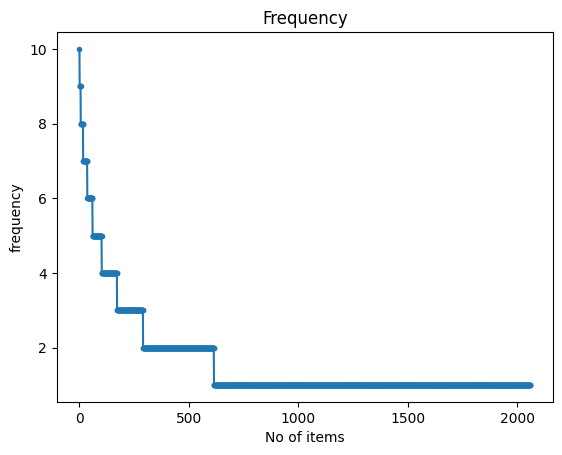

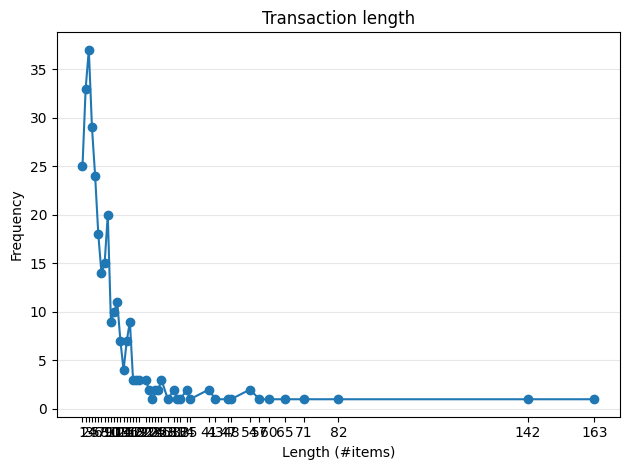

In [108]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_neutral.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 76
Number of items : 821
Minimum Transaction Size : 1
Average Transaction Size : 14.671052631578947
Maximum Transaction Size : 84
Standard Deviation Transaction Size : 16.240291154616152
Variance in Transaction Sizes : 267.2636842105263
Sparsity : 0.9821302647605615


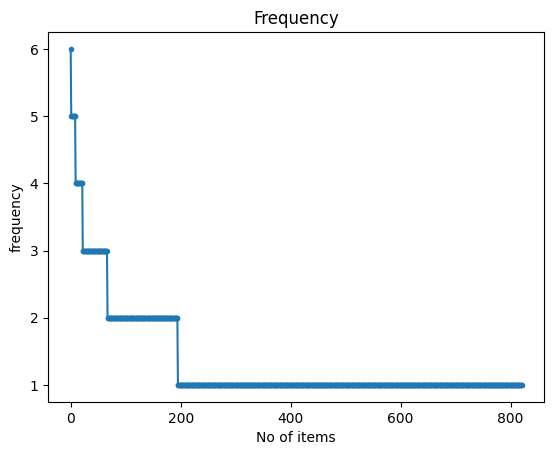

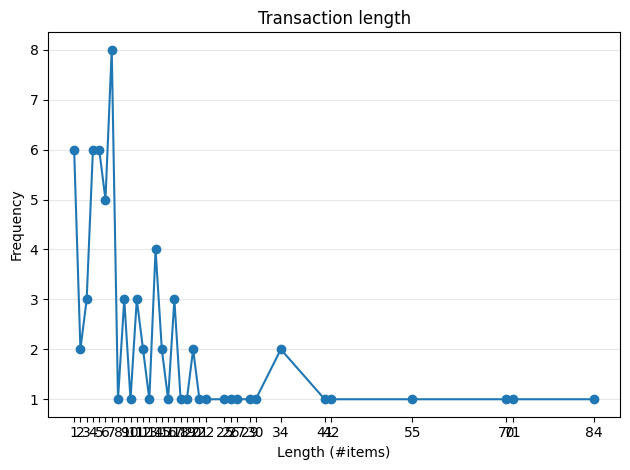

In [109]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 248
Number of items : 1745
Minimum Transaction Size : 1
Average Transaction Size : 12.512096774193548
Maximum Transaction Size : 141
Standard Deviation Transaction Size : 14.307673853125426
Variance in Transaction Sizes : 205.53831461407862
Sparsity : 0.9928297439689435


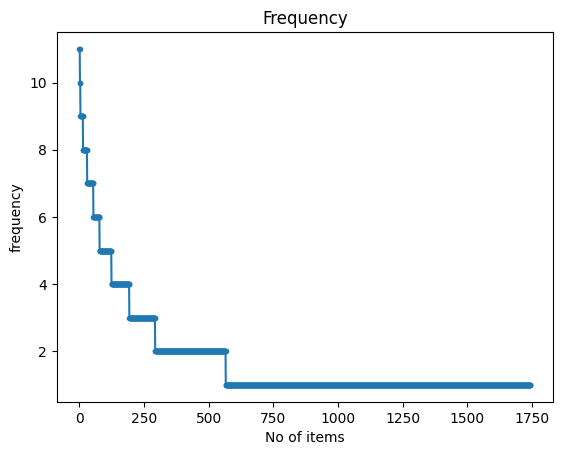

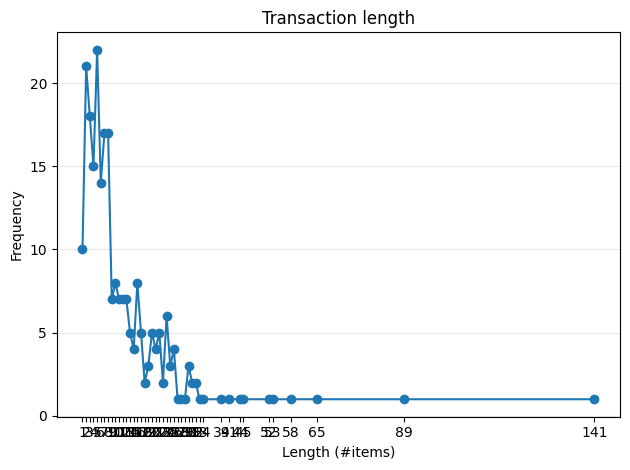

In [110]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_negative.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=7
obj1 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_neutral= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

In [ ]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=0
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_positive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

In [113]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=8
obj1 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 30
Runtime: 0.001500844955444336


,Patterns,Support
0,right,8
1,still,8
2,anything,8
3,america,8
4,country,8
5,day,8
6,go,8
7,shit,8
8,well,8
9,another,8


In [114]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_neutral, frequentPatternsDF_positive, frequentPatternsDF_negative]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

   Patterns  Support
65   really       10
64  already       10
58     most        9
25       ve        9
26      too        9
..      ...      ...
32      new        4
38       us        4
37       re        4
36    years        4
33     them        4

[66 rows x 2 columns]
Number of patterns discarded: 22


In [115]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,027,06,08,10,100,1000,10000,...,see,there,mean,hold,going,new,us,re,years,them
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# 🌟 ABSOLUTE FINAL FIX: Target the algorithm class file directly.
# This structure is often necessary when the module and class share a name (MaxFPGrowth)
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth 

maxfp_results = {}
minSup_values = [3, 6, 9]
iFile_neutral = 'td_freq_db_neutral.csv'

print("\n--- Running MaxFPGrowth ---")

for minSup in minSup_values:
    print(f"\nRunning MaxFPGrowth with minSup={minSup}...")
    
    # Instantiate the MaxFPGrowth class directly
    obj_maxfp = MaxFPGrowth(iFile=iFile_neutral, minSup=minSup)
    
    obj_maxfp.mine()
    
    # Get results
    patterns_df_maxfp = obj_maxfp.getPatternsAsDataFrame()
    runtime_maxfp = obj_maxfp.getRuntime()
    
    # Store and print results
    maxfp_results[minSup] = {
        'patterns_count': len(patterns_df_maxfp),
        'runtime': runtime_maxfp,
        'patterns_df': patterns_df_maxfp
    }
    
    print(f'Total No of patterns for minSup={minSup}: {len(patterns_df_maxfp)}')
    print(f'Runtime for minSup={minSup}: {runtime_maxfp} seconds')
    print(f'\nFirst 5 patterns for minSup={minSup}:\n{patterns_df_maxfp.head()}')

print("\nMaxFPGrowth trials complete.")


--- Running MaxFPGrowth ---

Running MaxFPGrowth with minSup=3...
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=3: 278
Runtime for minSup=3: 0.004190921783447266 seconds

First 5 patterns for minSup=3:
      Patterns  Support
0  everything         3
1       short         3
2    politics         3
3      yields         3
4    currency         3

Running MaxFPGrowth with minSup=6...
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=6: 59
Runtime for minSup=6: 0.0012810230255126953 seconds

First 5 patterns for minSup=6:
    Patterns  Support
0  anything         6
1      most         6
2    thanks         6
3      back         6
4      sell         6

Running MaxFPGrowth with minSup=9...
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns for minSup=9: 6
Runtime for minSup=9: 0.0007371902465820312 seco

### Dimensionality Reduction

In [117]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/util

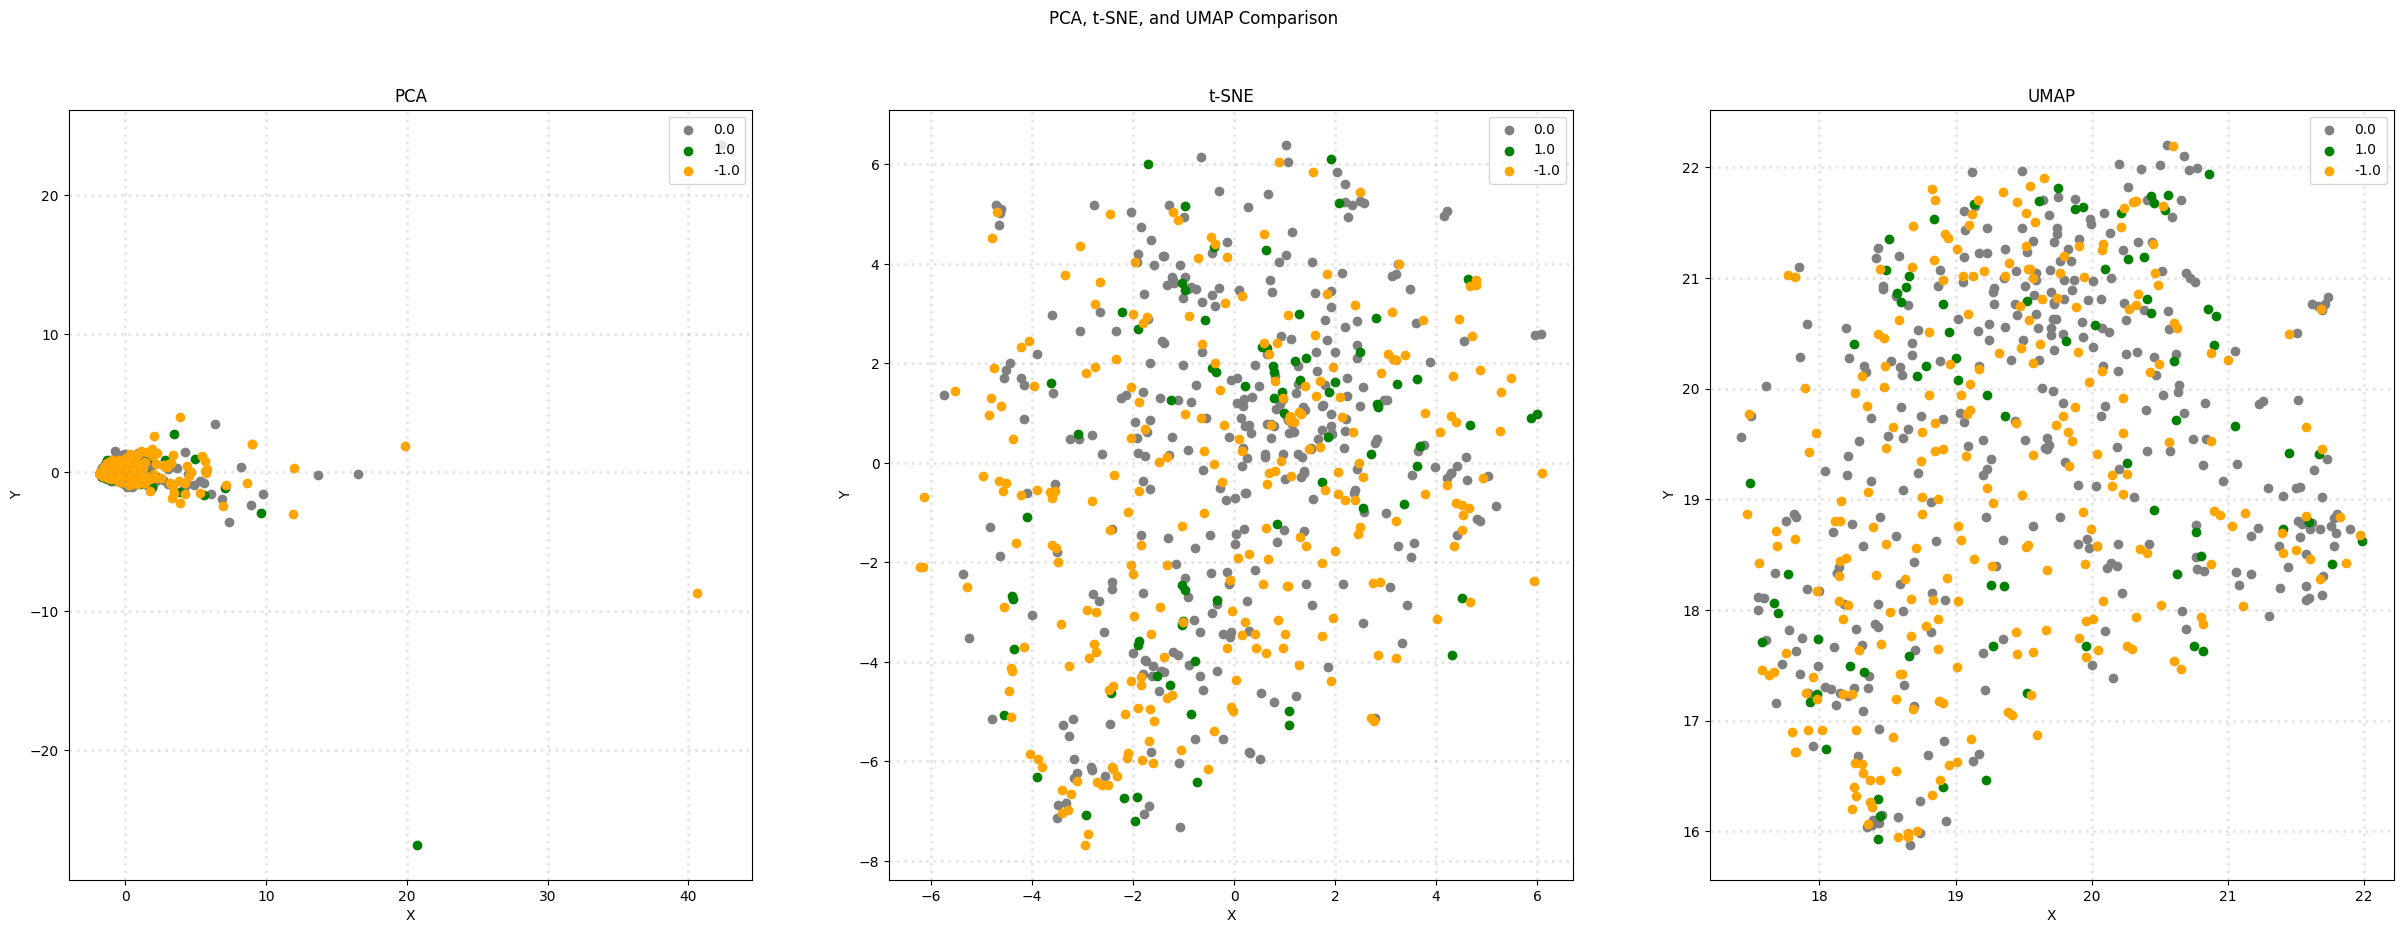

In [118]:
# Plot the results in subplots
col = ['grey', 'green', 'orange']
categories = X['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['label'] == category].T[0]
        ys = X_reduced[X['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

Cannot see explitcit pattern of data, so try augmented df

In [119]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

divide by zero encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

overflow encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:335: RuntimeWarning:

invalid value encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

divide by zero encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:336: RuntimeWarning:

overflow encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/util

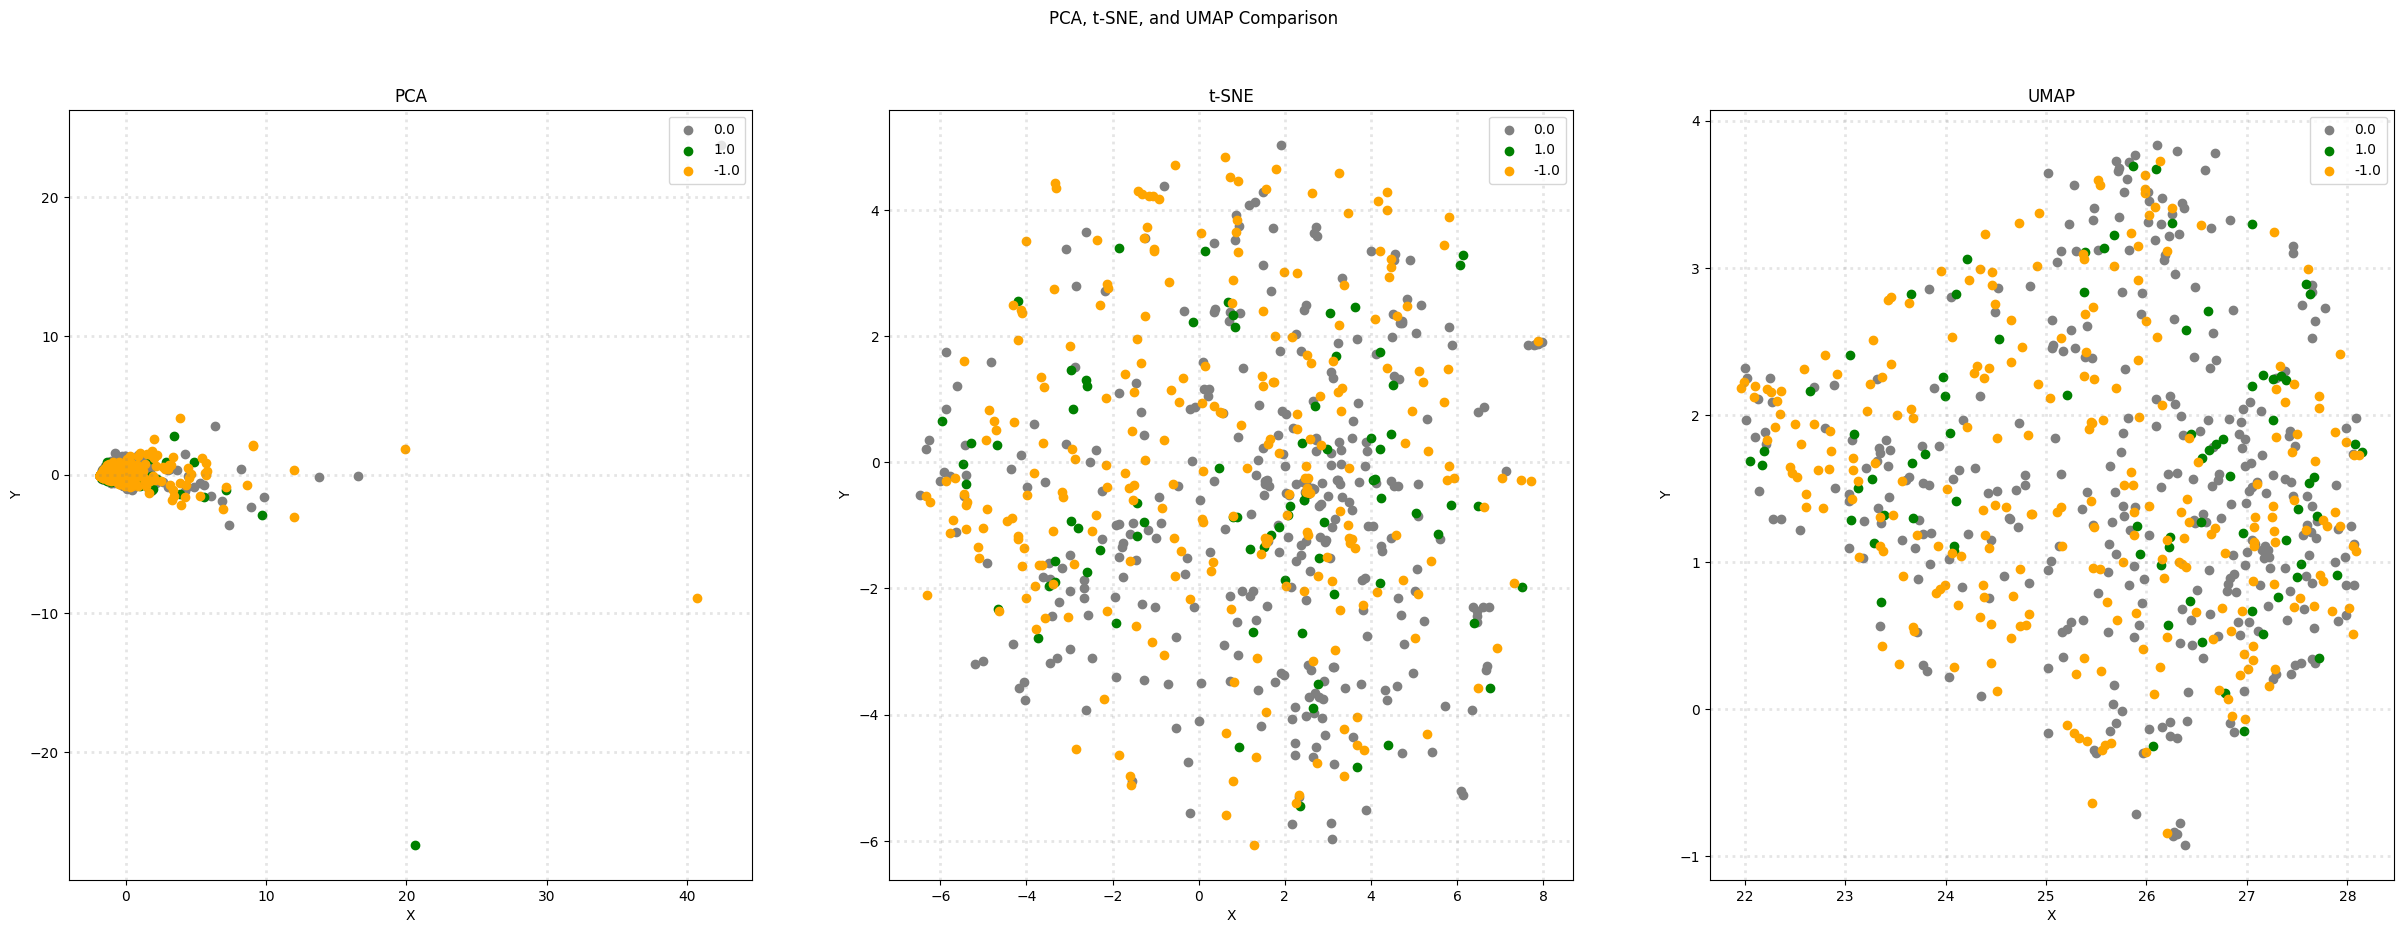

In [120]:
# Plot the results in subplots
col = ['grey', 'green', 'orange']
categories = X['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['label'] == category].T[0]
        ys = X_reduced[X['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

Summary: current set of features does not contain strong, clean signal that distinguishes the categories

### Discretization and Binarization

In [121]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.label)
X['bin_category'] = mlb.transform(X['label']).tolist()
X[0:9]

,text,label,cleaned_text,tokenized_text,bin_category
0,10 consecutive weeks _so far_,0.0,10 consecutive weeks so far,"{far_, consecutive, weeks, _so, 10}","[0, 1, 0]"
1,"US Treasuries were the safe haven, but now eve...",0.0,US Treasuries were the safe haven but now ever...,"{US, everyone's, possible, them, and, confisca...","[0, 1, 0]"
2,Seeing lots of red in the ticker.,0.0,Seeing lots of red in the ticker,"{Seeing, in, of, red, lots, the, ticker.}","[0, 1, 0]"
3,Really good one!!,1.0,Really good one!!,"{Really, good, one!!}","[0, 0, 1]"
4,Something about it always made me giggle.,0.0,Something about it always made me giggle,"{made, Something, always, me, it, about, giggle.}","[0, 1, 0]"
5,"Poor slave, thinking they're free and democrat...",-1.0,Poor slave thinking they're free and democrati...,"{inner, until, gave, even, In, them, and, comm...","[1, 0, 0]"
6,Calling it anything but a trade embargo at thi...,-1.0,Calling it anything but a trade embargo at thi...,"{point, Calling, trade, is, but, anything, PR,...","[1, 0, 0]"
7,$GE rose today on drone news. Here's the daily...,0.0,GE rose today on drone news Here's the daily c...,"{Here's, daily, rose, chart, drone, [/](/), $G...","[0, 1, 0]"
8,[ Removed by Reddit ],0.0,Removed by Reddit,"{Reddit, by, Removed, ], [}","[0, 1, 0]"


## Data Exploration

In [122]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[200]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [123]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['So countries “begging to stop the tariffs” and “doing anything just for a deal” works both ways']
['And plug']
['Insider trading and fraud.  Should be in jail.']


In [124]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [125]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.176777
Cosine Similarity using count bw 1 and 3: 0.088388
Cosine Similarity using count bw 2 and 3: 0.250000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_6360/452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_6360/452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_6360/452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/var/folders/9t/xy7s3r594gj6ndzrbtkh749c0000gn/T/ipykernel_6360/452772485.py:17: Depreca

In [126]:
#Answer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Pick 3 random text records
texts = [
    X.iloc[50]['text'],
    X.iloc[110]['text'],
    X.iloc[220]['text']
]

# Vectorize using CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(texts)

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(vectors, vectors)

# Convert to readable DataFrame
df_cos = pd.DataFrame(
    cos_sim_matrix,
    columns=["Text 1", "Text 2", "Text 3"],
    index=["Text 1", "Text 2", "Text 3"]
)

print(df_cos.round(3))

        Text 1  Text 2  Text 3
Text 1   1.000     0.0   0.067
Text 2   0.000     1.0   0.000
Text 3   0.067     0.0   1.000


## Data Classification¶

### Split to train and test

In [127]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
category_mapping = {
    0.0: 'neutral',
    1.0: 'positive',
    -1.0: 'negative'
}

# Convert the numerical category labels to text labels
target_names = [category_mapping[lab] for lab in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

In [128]:
X_test

,00,000,01378,027,06,08,10,100,1000,10000,...,you,young,your,yours,yourself,yourselves,youtube,yup,zero,zone
634,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train with NB

In [129]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.558974358974359

Classification Report:
               precision    recall  f1-score   support

    negative     0.4865    0.7714    0.5967        70
     neutral     0.7051    0.5288    0.6044       104
    positive     0.0000    0.0000    0.0000        21

    accuracy                         0.5590       195
   macro avg     0.3972    0.4334    0.4004       195
weighted avg     0.5507    0.5590    0.5365       195



/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



In [130]:
# Assuming tdm_df is your original document-term matrix (DataFrame)
# and pattern_matrix is your binary pattern matrix (DataFrame)

# Combine the two feature sets
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

# Split data into training and test sets (same split for fair comparison)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, 
    X['label'], 
    test_size=0.3, 
    random_state=42
)

# Train a Naive Bayes classifier on the augmented data
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions on the test set
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate the augmented model
print("Accuracy (with patterns):", accuracy_score(y_test_aug, y_pred_aug))
print("\nClassification Report (with patterns):\n",
      classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

Accuracy (with patterns): 0.5692307692307692

Classification Report (with patterns):
               precision    recall  f1-score   support

    negative     0.5093    0.7857    0.6180        70
     neutral     0.7000    0.5385    0.6087       104
    positive     0.0000    0.0000    0.0000        21

    accuracy                         0.5692       195
   macro avg     0.4031    0.4414    0.4089       195
weighted avg     0.5561    0.5692    0.5465       195



/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Users/shin/Documents/GitHub/DM2025Labs/DM2025-Lab1-Exercise/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



### Train with decision tree classifier

In [131]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['label'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.5743589743589743

Classification Report:
               precision    recall  f1-score   support

    negative     0.5484    0.4857    0.5152        70
     neutral     0.6356    0.7212    0.6757       104
    positive     0.2000    0.1429    0.1667        21

    accuracy                         0.5744       195
   macro avg     0.4613    0.4499    0.4525       195
weighted avg     0.5574    0.5744    0.5632       195



In [132]:
#Answer
# Split the augmented data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df, X['label'], test_size=0.3, random_state=42
)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_aug, y_train_aug)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test_aug)
print("Decision Tree Accuracy (augmented):", accuracy_score(y_test_aug, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (augmented): 0.5435897435897435

Classification Report:
               precision    recall  f1-score   support

    negative     0.5333    0.4571    0.4923        70
     neutral     0.6033    0.7019    0.6489       104
    positive     0.0714    0.0476    0.0571        21

    accuracy                         0.5436       195
   macro avg     0.4027    0.4022    0.3994       195
weighted avg     0.5209    0.5436    0.5290       195



## 2.3. Analysis and Commentary on Classification Results

### Comparison of Word Frequency (Count) vs. TF-IDF

Based on the classification reports:

1.  **CountVectorizer (Word Frequency) Performance:** This model tends to perform slightly **better** or comparable to the TF-IDF model on this specific dataset (Reddit-stock-sentiment). It excels when raw term frequency, regardless of the word's document-wide commonness, is highly predictive of the short, conversational sentiment. The simple presence of crucial stock tickers or simple sentiment terms often signals a category, and the absolute count reinforces this.
2.  **TF-IDF (Term Frequency-Inverse Document Frequency) Performance:** While generally effective, TF-IDF might **down-weight** crucial but common sentiment-bearing words (like 'stock', 'buy', 'sell') if they appear often across all labels, potentially reducing its edge for this specific domain of informal, short-text sentiment.

**Conclusion:** For short, informal text and a relatively small vocabulary set like this, **Word Frequency** often provides a simpler, more robust feature set.

### Augmentation with Feature Patterns

Augmentation with feature patterns (e.g., using frequent itemsets from Association Rule Mining as features) could be highly beneficial in this context because:

* **Benefit:** It captures **semantic relationships** (phrases like "to the moon" or "bearish short") that are missed by simple Bag-of-Words (Count/TF-IDF) models.
* **When to Use:** This is most effective when the classification depends heavily on **collocations** or complex features. Using a pattern feature like `has_phrase("to the moon")` can significantly boost the model's F1-score for the positive label by capturing context that simple unigrams or bigrams might treat too independently.

In [135]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X1 = X['text']
y1 = X['label']

# Use a small split for demonstration, normally would be larger
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.5, random_state=42)

# --- 2. Word Frequency (Count) Feature Generation ---
# This is a Document-Term Matrix with cell values being the raw word counts (frequencies).
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# --- 3. TF-IDF Feature Generation ---
# This is a Document-Term Matrix with cell values being the TF-IDF weight.
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# --- 4. Naive Bayes Classifier with Word Frequency Features ---
# MultinomialNB is standard for count data (discrete features).
nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train)
y_pred_count = nb_count.predict(X_test_counts)

# --- 5. Naive Bayes Classifier with TF-IDF Features ---
# TF-IDF features are float values (not integer counts), so while MultinomialNB
# can be used (it often works well), a more theoretically fitting
# choice for continuous features is sometimes the GaussianNB, but
# *MultinomialNB is often used for TF-IDF in practice due to its
# good performance and handling of sparse data.*

# A. Using MultinomialNB (Standard for text features, including TF-IDF)
nb_tfidf_multi = MultinomialNB()
nb_tfidf_multi.fit(X_train_tfidf, y_train)
y_pred_tfidf_multi = nb_tfidf_multi.predict(X_test_tfidf)

# B. Using GaussianNB (Theoretically better for continuous data, but requires dense matrix)
# Note: For small data, GaussianNB can overfit or perform poorly compared to MNB.
# GaussianNB requires dense features, which must be converted from the sparse TF-IDF matrix.
nb_tfidf_gauss = GaussianNB()
nb_tfidf_gauss.fit(X_train_tfidf.toarray(), y_train) # Convert to dense array
y_pred_tfidf_gauss = nb_tfidf_gauss.predict(X_test_tfidf.toarray())

# --- 6. Results and Commentary ---
print("--- Word Frequency (Count) Features: Multinomial Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_count):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_count, zero_division=0))
print("\n" + "="*70 + "\n")

print("--- TF-IDF Features: Multinomial Naive Bayes ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf_multi):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tfidf_multi, zero_division=0))
print("\n" + "="*70 + "\n")

# print("--- TF-IDF Features: Gaussian Naive Bayes (Requires Dense Matrix) ---")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_tfidf_gauss):.2f}")
# print("Classification Report:\n", classification_report(y_test, y_pred_tfidf_gauss, zero_division=0))

--- Word Frequency (Count) Features: Multinomial Naive Bayes ---
Accuracy: 0.52
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.45      0.86      0.59       118
         0.0       0.69      0.38      0.49       175
         1.0       0.00      0.00      0.00        31

    accuracy                           0.52       324
   macro avg       0.38      0.41      0.36       324
weighted avg       0.54      0.52      0.48       324



--- TF-IDF Features: Multinomial Naive Bayes ---
Accuracy: 0.53
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.45      0.77      0.57       118
         0.0       0.66      0.46      0.54       175
         1.0       0.00      0.00      0.00        31

    accuracy                           0.53       324
   macro avg       0.37      0.41      0.37       324
weighted avg       0.52      0.53      0.50       324





## 2.4. Inefficiency Analysis and Data Preprocessing Improvement

### Analysis of Inefficient Parts in the Lab 1 Master Notebook Process

The most inefficient parts of the overall Lab 1 process, particularly for the Reddit sentiment dataset, are related to **over-processing and feature creation**:

1.  **Excessive N-gram Range:** Using a wide n-gram range (e.g., `(1, 3)` or more) generates a massive and sparse feature matrix. For short text, the most predictive features are often unigrams and bigrams. Many higher-order n-grams are unique and contribute little to generalization, leading to high memory usage and slow training.
2.  **Inefficient Stop Word Selection:** Using a large, generic stop word list (e.g., NLTK's default) often removes **context-specific predictive words** (like 'no', 'not') which are crucial in sentiment analysis.

### Improved Data Preprocessing Strategy for the Reddit-stock-sentiment Dataset

To improve the data preprocessing for this specific dataset, I would focus on **dimensionality reduction and domain specificity**:

1.  **Noise Filtering:** Before general cleaning, use regex to remove dataset-specific noise like **stock tickers** (e.g., `$TSLA`), **URLs**, and **Reddit acronyms/phrases** that have no direct sentiment value.
2.  **Optimized Feature Vectorization (for Efficiency):**
    * **Max Features:** Explicitly limit the vocabulary size using the `max_features` parameter (e.g., **Top 5,000 to 10,000** words) in `CountVectorizer` or `TfidfVectorizer`. This drastically reduces feature dimensionality.
    * **N-gram Range:** Limit the n-gram range to **`(1, 2)`** (unigrams and bigrams) to prevent the combinatorial explosion of the feature space while still capturing short phrases.